# Objective
1. Convert categorial variables using one-hot encoding for training models
2. Perform different regression models(Multilinear regression, Ridge regression, Lasso regression, Random Forest and XGboost).
3. Selection of best model: model which gives least Mean Absolute Error(MAE) for test data.
4. Saving the best model in binary format for deployment.

# Importing libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

#import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from xgboost import XGBRegressor

import matplotlib.pyplot as plt

# displaying all the columns and row throughout the notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Importing data 

In [2]:
df_car = pd.read_csv('data_modelbuild.csv')
df = df_car.copy()

Lets look at the first few rows of data below.

In [3]:
df.head()

,Unnamed: 0,price($),age_of_car,model,Transmission,Mileage(miles),Exterior_Color,Interior_Color,Gas_mileage_comb(MPG),Engine,Drivetrain,Fuel_type,No._of_features,description_len,Exterior_color_imputed
0,0,36999,4,Mercedes-Benz,Automatic,30336,Silver,Black,19,V6,All-Wheel Drive,Gasoline,5,2551,0
1,1,39415,4,Chevrolet,Automatic,36052,Black,Black,25,V8,Front-Wheel Drive,Flex Fuel Vehicle,15,6158,0
2,2,19697,1,Honda,Automatic,17000,Gray,Black,33,I4,Front-Wheel Drive,Gasoline,5,2683,0
3,3,24799,4,Ford,Automatic,39221,Gray,Black,20,V6,Front-Wheel Drive,Gasoline,7,3341,0
4,4,24299,4,Jeep,Automatic,33961,White,Black,18,V6,Four-Wheel Drive,Gasoline,1,2090,0


Saving Categorial columns for One-Hot encoding.

In [4]:
Categorial_col = ['model', 'Transmission', 'Exterior_Color', 'Interior_Color', 'Engine', 'Drivetrain', 'Fuel_type']

# One-Hot Encoding Categorial Variables

In [5]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder_fit = OH_encoder.fit_transform(df[Categorial_col])
column_name = OH_encoder.get_feature_names_out(Categorial_col)
OH_cols = pd.DataFrame(encoder_fit, columns=column_name)
# One-hot encoding removed index; put it back
OH_cols.index = df.index
# Remove categorical columns (will replace with one-hot encoding)
num_col = df.drop(Categorial_col, axis=1)
# Add one-hot encoded columns to numerical features
OH_df = pd.concat([num_col, OH_cols], axis=1)

Lets look at the dataframe after conversion of categorial data.

In [6]:
OH_df.head()

,Unnamed: 0,price($),age_of_car,Mileage(miles),Gas_mileage_comb(MPG),No._of_features,description_len,Exterior_color_imputed,model_Acura,model_Alfa,model_Aston,model_Audi,model_BMW,model_Bentley,model_Buick,model_Cadillac,model_Chevrolet,model_Chrysler,model_Dodge,model_FIAT,model_Ferrari,model_Ford,model_GMC,model_Genesis,model_Honda,model_Hyundai,model_INFINITI,model_Jaguar,model_Jeep,model_Kia,model_Land,model_Lexus,model_Lincoln,model_MINI,model_Maserati,model_Mazda,model_Mercedes-Benz,model_Mitsubishi,model_Nissan,model_Porsche,model_RAM,model_Rolls-Royce,model_Scion,model_Subaru,model_Tesla,model_Toyota,model_Volkswagen,model_Volvo,Transmission_Automatic,Transmission_Manual,Exterior_Color_Black,Exterior_Color_Blue,Exterior_Color_Gray,Exterior_Color_Red,Exterior_Color_Silver,Exterior_Color_White,Interior_Color_Black,Interior_Color_Gray,Interior_Color_Red,Interior_Color_Silver,Interior_Color_White,Engine_H4,Engine_H6,Engine_I2,Engine_I3,Engine_I4,Engine_I5,Engine_I6,Engine_V10,Engine_V12,Engine_V6,Engine_V8,Engine_W12,Drivetrain_All-Wheel Drive,Drivetrain_Four-Wheel Drive,Drivetrain_Front-Wheel Drive,Drivetrain_Rear-Wheel Drive,Fuel_type_Biodiesel,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Flex Fuel Vehicle,Fuel_type_Gasoline,Fuel_type_Hybrid
0,0,36999,4,30336,19,5,2551,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,39415,4,36052,25,15,6158,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,19697,1,17000,33,5,2683,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,24799,4,39221,20,7,3341,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,24299,4,33961,18,1,2090,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Saving target value(Price of car) into X and Features in y.

In [7]:
y= OH_df['price($)']
X= OH_df.drop(['price($)'], axis=1)

Splitting data into 80:20 ratio for training and testing.

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

X_train should have 80% of the initial data (1605 rows).

In [9]:
X_train.shape

(1284, 82)

# Machine learning algorithms

## Multilinear regression

In [10]:
lm = LinearRegression()
lm_scores = -1*cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(lm_scores)), 
                                                        round(np.std(lm_scores))))

MAE score: 5039 and standard deviation 318


Using cross validation for evaluation of model.

## Ridge regression
This model penalises large coefficients using alpha to prevent overfitting (Regularisation).

In [11]:
rr = Ridge(alpha=0.01)
rr_scores = -1*cross_val_score(rr, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(rr_scores)), 
                                                        round(np.std(rr_scores))))

MAE score: 5040 and standard deviation 318


Finding the optimum alpha value by plotting error vs alpha.

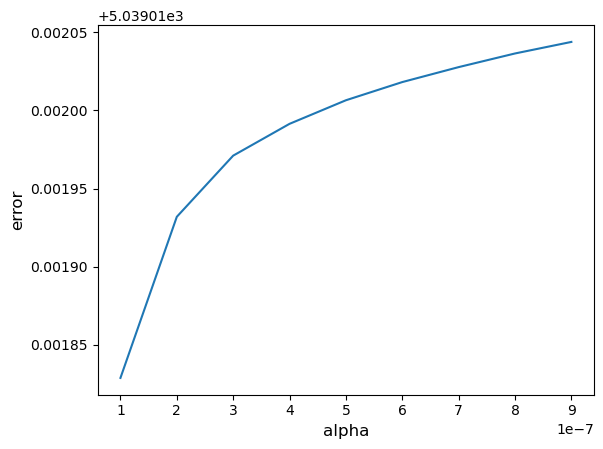

In [12]:
#ref: https://github.com/PlayingNumbers/ds_salary_proj/blob/master/model_building.py
alpha = []
error = []

for i in range(1,10) :
    alpha.append(i/1e7)
    rr = Ridge(alpha=(i/1e7))
    error.append(np.mean(-1*cross_val_score(rr, X_train, y_train, 
                                            scoring = 'neg_mean_absolute_error')))
plt.xlabel('alpha', fontsize=12)
plt.ylabel('error', fontsize=12)
plt.plot(alpha,error);

4e-7 is the optimum value of alpha. Putting that in model and checking the performance.

In [13]:
rr_min = Ridge(alpha=4e-7)
rr_min_scores = -1*cross_val_score(rr_min, X_train, y_train, 
                                   scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(rr_min_scores)), 
                                                        round(np.std(rr_min_scores))))

MAE score: 5039 and standard deviation 318


No such improvement in mean absolute error from alpha =0.01 to 4e-7.

## Lasso regression
Similar model to ridge regression. However the coeffiecnt value can be equal to 0 unlike in ridge regression.

In [14]:
ls = Lasso(alpha = 0.01)
ls_scores = -1*cross_val_score(ls, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(ls_scores)), 
                                                        round(np.std(ls_scores))))

MAE score: 5274 and standard deviation 581


## Elastic net
It is a combination of Ridge and Lasso regression models.

In [15]:
en = ElasticNet(alpha = 0.01)
en_scores = -1*cross_val_score(en, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(en_scores)), 
                                                        round(np.std(en_scores))))

MAE score: 5595 and standard deviation 288


## Random Forest regression
Using decision tree model as the data is sparse and tree based model should work too.

In [16]:
rf = RandomForestRegressor(random_state = 0)
rf_scores = -1*cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(rf_scores)), 
                                                        round(np.std(rf_scores))))

MAE score: 4606 and standard deviation 293


Random forest gave a lower mean absolute error than linear regression models which could be due to non-linear dependency of features.

## XGBoost regression
It is a most advanced model which is based on Random Forest that uses extreme gradient boosting framework. 

In [17]:
xg = XGBRegressor()
xg_scores = -1*cross_val_score(xg, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(xg_scores)), 
                                                        round(np.std(xg_scores))))

MAE score: 4613 and standard deviation 387


The mean absolute error value is closer to Random Forest model. In order to enchance the performace tuning of parameters can be done using GridSearchCV. 

### Hyper-Parameter tuning

#### Tune n_estimators
Finding the optimum number of decision trees. Adding more trees beyond a limit does not improve the performance of the model. Ref:[here](https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/)

Best parameter is {'n_estimators': 350} with MAE score 4575


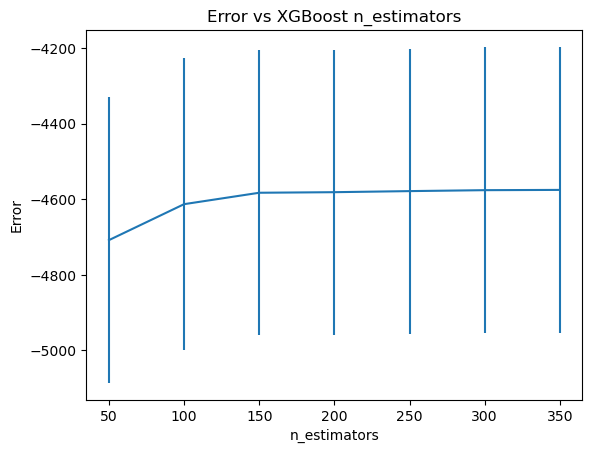

In [18]:
n_estimators = range(50, 400, 50)
parameters = {'n_estimators': n_estimators}
gs = GridSearchCV(xg, parameters, scoring='neg_mean_absolute_error', n_jobs = -1)
gs_result=gs.fit(X_train,y_train);
# results
means = gs_result.cv_results_['mean_test_score']
stds = gs_result.cv_results_['std_test_score']
#best parameter
print('Best parameter is {} with MAE score {}'.format(gs.best_params_, round(-1*gs.best_score_)))
#Plot
plt.errorbar(n_estimators, means, yerr=stds);
plt.title("Error vs XGBoost n_estimators")
plt.xlabel('n_estimators')
plt.ylabel('Error')
plt.show()

A slight improvement in MAE with n_estimator value of 250 however there is little to no difference from 100 to 350 number of trees. A slight improvement can be seen from 200 to 250. Since data set is small, 250 number of estimators can be used.

#### Tune max_depth
Finding optimum value for the number of layers of depth. Shallow trees are expected to have poor performance because they capture few details of the problem and are generally referred to as weak learners. Deeper trees generally capture too many details of the problem and overfit the training dataset, limiting the ability to make good predictions on new data. 

Best parameter is {'max_depth': 5, 'n_estimators': 250} with MAE score 4463


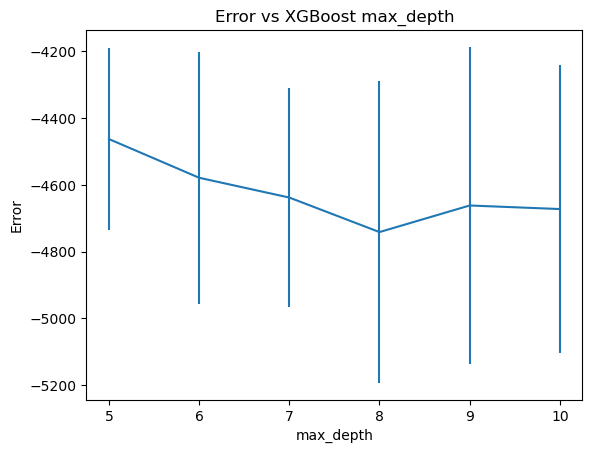

In [19]:
max_depth=range(5,11)
parameters_1 = {'max_depth':max_depth, 'n_estimators': [250]}
gs1 = GridSearchCV(xg, param_grid = parameters_1, scoring='neg_mean_absolute_error', n_jobs = -1)
gs1_result=gs1.fit(X_train,y_train)
# results
means1 = gs1_result.cv_results_['mean_test_score']
stds1 = gs1_result.cv_results_['std_test_score']
#best parameter
print('Best parameter is {} with MAE score {}'.format(gs1.best_params_, round(-1*gs1.best_score_)))
#Plot
plt.errorbar(max_depth, means1, yerr=stds1);
plt.title("Error vs XGBoost max_depth")
plt.xlabel('max_depth')
plt.ylabel('Error')
plt.show()

Further improvement in MAE score can be observed for max_depth = 8 as can be seen in the above graph.

The above two parameters have the highest impact on model outcome. Other parameters can be tuned however, the default value will be used as not much improvement is expected at this point for the give dataset.

In [20]:
gs1.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Saving XGBoost model with tuned parameters.

In [21]:
xgf = gs1.best_estimator_
xgf_scores = -1*cross_val_score(xgf, X_train, y_train, 
                               scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(xgf_scores)), 
                                                        round(np.std(xgf_scores))))

MAE score: 4463 and standard deviation 274


# Model Performance
Lets check the performance of all the models to select the best one. Final model selection will be based on test set which was split prevent data leakage. 

In [22]:
#multilinear model
lm.fit(X_train,y_train)
y_pred_lm = lm.predict(X_valid)
print('Multilinear model MAE: {}'.format(round(mean_absolute_error(y_valid,y_pred_lm))))

#Ridge regression
rr_min.fit(X_train,y_train)
y_pred_rr_min = rr_min.predict(X_valid)
print('Ridge regression model MAE: {}'.format(round(mean_absolute_error(y_valid,y_pred_rr_min))))

#Lasso regression
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_valid)
print('Lasso regression model MAE: {}'.format(round(mean_absolute_error(y_valid,y_pred_ls))))

#Elastic net
en.fit(X_train,y_train)
y_pred_en = en.predict(X_valid)
print('ElasticNet regression model MAE: {}'.format(round(mean_absolute_error(y_valid,y_pred_en))))

#Random Forest regression
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_valid)
print('RandomForest regression model MAE: {}'.format(round(mean_absolute_error(y_valid,y_pred_rf))))

#XGBoost
xg.fit(X_train,y_train)
y_pred_xg = xg.predict(X_valid)
print('XGBoost regression model MAE: {}'.format(round(mean_absolute_error(y_valid,y_pred_xg))))

#XGBoost hypertuned
xgf.fit(X_train,y_train)
y_pred_xgf = xgf.predict(X_valid)
print('XGBoost hypertuned regression model MAE: {}'.format(round(mean_absolute_error(y_valid,y_pred_xgf))))

Multilinear model MAE: 4923
Ridge regression model MAE: 4923
Lasso regression model MAE: 4868
ElasticNet regression model MAE: 5529
RandomForest regression model MAE: 4722
XGBoost regression model MAE: 4131
XGBoost hypertuned regression model MAE: 4245


The best model seems to be XGBoost with default parameters. XGBoost is first choice for most of the problems as it is the most advance algorithm. The model predicts the price of car within $4185 of the actual value. 

# Feature importance

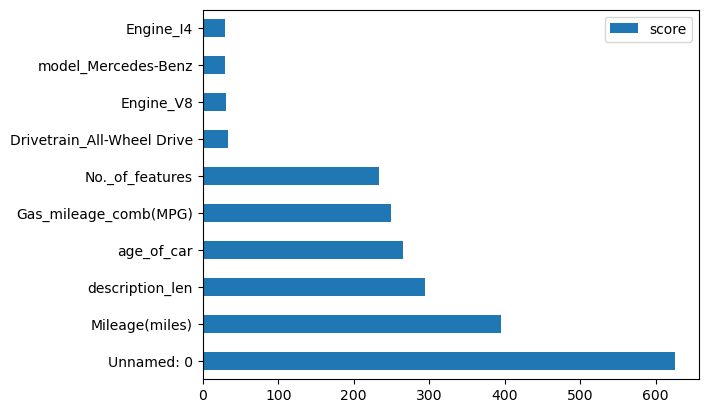

In [23]:
feature_important = xg.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:10].plot(kind='barh');

The price of the used car is highly dependent on Mileage of the car (Odometer reading), then followed by the age of the car.  
It is interesting to see that length of description is also highly dependent on the price. It's possible that dealers write more in Description for expensive cars.  
Higher Gas mileage (Km/L) mean higher efficiency(new technology) which could be the reason for high dependency on the price on the car.  
No. of Features is also highly dependent on the price of the car.  
All other factors are weakly dependent on the price. 

# Finalizing model and saving for deployment
XGBoost model performed the best. Saving this model in binary format using pickle library.

In [26]:
# importing library
import pickle

#saving file
filename = 'model.pkl'
pickle.dump(xg, open(filename, 'wb'))

In [25]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

#Checking MAE on test dataset
y_pred_loaded_model = loaded_model.predict(X_valid)
print('Model MAE: {}'.format(round(mean_absolute_error(y_valid, y_pred_loaded_model))))

Model MAE: 4131


This MAE matches with the model value.  
Everything looks good! 

# Next Steps
Next steps involve deployment of model in a webserver.